In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras import Model, layers
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import datetime as dt
import matplotlib.pyplot as plt

In [ ]:

IMAGE_SHAPE = (224, 224,3)

train_path = "/content/drive/MyDrive/jishan defence/Covid19-dataset/train"
test_path = "/content/drive/MyDrive/jishan defence/Covid19-dataset/test"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   rotation_range=10,
                                   brightness_range=[0.5, 1.5],
                                   vertical_flip=False,
                                   horizontal_flip = False)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 251 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            shuffle =False)

Found 66 images belonging to 3 classes.


In [ ]:
conv_base = ResNet50(
    include_top=False,
    weights='imagenet')

for layer in conv_base.layers:
    layer.trainable = False

In [ ]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 
predictions = layers.Dense(3, activation='softmax')(x)
model = Model(conv_base.input, predictions)

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [ ]:
h=model.fit(
  training_set,
  validation_data=test_set,
  batch_size=32, #data train korbe 8 ta kore ekbare
  epochs=20, #hole data ke total 20 bar train korano hoi
  
)

Epoch 1/20
8/8 [==============================] - 79s 8s/step - loss: 1.2185 - accuracy: 0.3785 - val_loss: 1.0383 - val_accuracy: 0.6061
Epoch 2/20
8/8 [==============================] - 15s 2s/step - loss: 1.0743 - accuracy: 0.3865 - val_loss: 1.0195 - val_accuracy: 0.5758
Epoch 3/20
8/8 [==============================] - 14s 2s/step - loss: 1.0354 - accuracy: 0.5179 - val_loss: 0.9273 - val_accuracy: 0.5303
Epoch 4/20
8/8 [==============================] - 14s 2s/step - loss: 0.9841 - accuracy: 0.5219 - val_loss: 0.9003 - val_accuracy: 0.6667
Epoch 5/20
8/8 [==============================] - 14s 2s/step - loss: 0.9496 - accuracy: 0.5657 - val_loss: 0.8544 - val_accuracy: 0.5606
Epoch 6/20
8/8 [==============================] - 14s 2s/step - loss: 1.0037 - accuracy: 0.5219 - val_loss: 0.8380 - val_accuracy: 0.6818
Epoch 7/20
8/8 [==============================] - 14s 2s/step - loss: 0.9291 - accuracy: 0.5737 - val_loss: 0.7904 - val_accuracy: 0.7121
Epoch 8/20
8/8 [==================

In [ ]:
loss,test_accuracy =model.evaluate(test_set)
print('Accuracy on test:', test_accuracy)

3/3 [==============================] - 2s 408ms/step - loss: 0.6420 - accuracy: 0.8030
Accuracy on test: 0.8030303120613098


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
# T0 print the Classification Report
y_pred =model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(test_set.classes, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93        26
           1       0.92      0.55      0.69        20
           2       0.65      0.85      0.74        20

    accuracy                           0.80        66
   macro avg       0.82      0.79      0.78        66
weighted avg       0.83      0.80      0.80        66



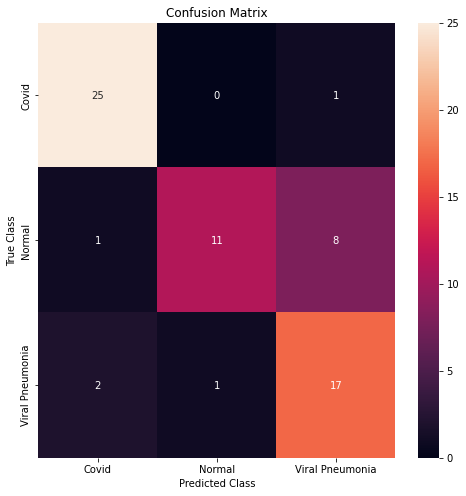

In [ ]:
# To print the Confusion Matrix
cf_matrix = confusion_matrix(test_set.classes,y_pred)
Labels = ['Covid','Normal','Viral Pneumonia']
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(cf_matrix, xticklabels=Labels, yticklabels=Labels, annot=True, fmt='d', color='blue')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

ValueError: ignored

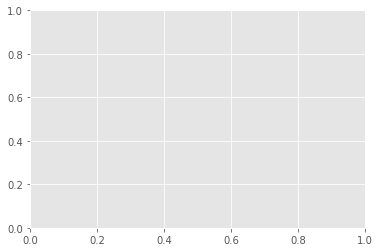

In [ ]:
# plot the training loss and accuracy
N = epochs=10
plt.style.use("ggplot")
plt.figure()
#plt.plot(np.arange(0, N), h.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), h.history["accuracy"], label="train_acc")
#plt.plot(np.arange(0, N), h.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")